# Credit Ratings on Fixed Quarter Dates with Earnings Call Date for Linkup

Get credit ratings on fixed quarter dates.

Use list of earnings call dates to find the preceding earnings call date.

In [1]:
# packages
import pandas as pd
import pandasql as ps
import matplotlib.pyplot as plt

In [3]:
# Load credit ratings data
credit_ratings = pd.read_csv('~/Box/STAT 222 Capstone/Intermediate Data/Credit_Rating/combined_credit_rating_data.csv')
# Rename Date to rating_date, Next Rating Date or End of Data to next_rating_date_or_end_of_data, Symbol to ticker
credit_ratings = credit_ratings.rename(columns={'Date': 'rating_date', 'Next Rating Date or End of Data': 'next_rating_date_or_end_of_data', 'Symbol': 'ticker'})
# Create year variable from rating_date
credit_ratings['Year'] = pd.to_datetime(credit_ratings['rating_date']).dt.year
# Limit rating agency and scope
credit_ratings = credit_ratings[credit_ratings['Rating Agency Name'].str.contains('Standard & Poor\'s') & (credit_ratings['Year'] >= 2010) & (credit_ratings['Year'] <= 2016)]
credit_ratings

,Rating,ticker,Rating Agency Name,rating_date,Source,Rating Rank AAA is 10,Next Rating,Next Rating Date,Previous Rating,Previous Rating Date,next_rating_date_or_end_of_data,Type,Change in Rating,Year
5560,AAA,AAPL,Standard & Poor's Ratings Services,2014-04-24,Supplementary,10,AA,2014-05-27,NaN,NaN,2014-05-27,Ambiguous,NaN,2014
5561,AA,AAPL,Standard & Poor's Ratings Services,2014-05-27,Supplementary,9,AA,2015-02-18,AAA,2014-04-24,2015-02-18,Downgrade,-1.0,2014
5562,AA,AAPL,Standard & Poor's Ratings Services,2015-02-18,Supplementary,9,AA,2015-05-28,AA,2014-05-27,2015-05-28,Affirmation,0.0,2015
5563,AA,AAPL,Standard & Poor's Ratings Services,2015-05-28,Both,9,AA,2015-06-02,AA,2015-02-18,2015-06-02,Affirmation,0.0,2015
5564,AA,AAPL,Standard & Poor's Ratings Services,2015-06-02,Supplementary,9,AA,2015-08-25,AA,2015-05-28,2015-08-25,Affirmation,0.0,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8727,BBB,ZTS,Standard & Poor's Ratings Services,2014-01-31,Both,7,BBB,2015-01-30,BBB,2013-10-11,2015-01-30,Affirmation,0.0,2014
8728,BBB,ZTS,Standard & Poor's Ratings Services,2015-01-30,Both,7,BBB,2015-11-03,BBB,2014-01-31,2015-11-03,Affirmation,0.0,2015
8729,BBB,ZTS,Standard & Poor's Ratings Services,2015-11-03,Supplementary,7,BBB,2016-01-22,BBB,2015-01-30,2016-01-22,Affirmation,0.0,2015
8730,BBB,ZTS,Standard & Poor's Ratings Services,2016-01-22,Both,7,BBB,2016-12-23,BBB,2015-11-03,2016-12-23,Affirmation,0.0,2016


In [4]:
# Create dataset of these dates from 2010 to 2016
# 1/1, 4/1, 7/1, 10/1
fixed_quarter_dates = pd.DataFrame({'fixed_quarter_date': ['2010-01-01', '2010-04-01', '2010-07-01', '2010-10-01', 
                                                           '2011-01-01', '2011-04-01', '2011-07-01', '2011-10-01', 
                                                           '2012-01-01', '2012-04-01', '2012-07-01', '2012-10-01', 
                                                           '2013-01-01', '2013-04-01', '2013-07-01', '2013-10-01', 
                                                           '2014-01-01', '2014-04-01', '2014-07-01', '2014-10-01', 
                                                           '2015-01-01', '2015-04-01', '2015-07-01', '2015-10-01', 
                                                           '2016-01-01', '2016-04-01', '2016-07-01', '2016-10-01']})
fixed_quarter_dates['fixed_quarter_date'] = pd.to_datetime(fixed_quarter_dates['fixed_quarter_date'])
fixed_quarter_dates

,fixed_quarter_date
0,2010-01-01
1,2010-04-01
2,2010-07-01
3,2010-10-01
4,2011-01-01
5,2011-04-01
6,2011-07-01
7,2011-10-01
8,2012-01-01
9,2012-04-01


## Join together

In [5]:
query = '''
SELECT a.*, b.fixed_quarter_date
FROM credit_ratings a
INNER JOIN fixed_quarter_dates b
ON a.rating_date <= b.fixed_quarter_date
    AND b.fixed_quarter_date <= a.next_rating_date_or_end_of_data
'''

# Run query
credit_ratings_on_fixed_quarter_dates = ps.sqldf(query, locals())
credit_ratings_on_fixed_quarter_dates

,Rating,ticker,Rating Agency Name,rating_date,Source,Rating Rank AAA is 10,Next Rating,Next Rating Date,Previous Rating,Previous Rating Date,next_rating_date_or_end_of_data,Type,Change in Rating,Year,fixed_quarter_date
0,AA,AAPL,Standard & Poor's Ratings Services,2014-05-27,Supplementary,9,AA,2015-02-18,AAA,2014-04-24,2015-02-18,Downgrade,-1.0,2014,2014-07-01 00:00:00.000000
1,AA,AAPL,Standard & Poor's Ratings Services,2014-05-27,Supplementary,9,AA,2015-02-18,AAA,2014-04-24,2015-02-18,Downgrade,-1.0,2014,2014-10-01 00:00:00.000000
2,AA,AAPL,Standard & Poor's Ratings Services,2014-05-27,Supplementary,9,AA,2015-02-18,AAA,2014-04-24,2015-02-18,Downgrade,-1.0,2014,2015-01-01 00:00:00.000000
3,AA,AAPL,Standard & Poor's Ratings Services,2015-02-18,Supplementary,9,AA,2015-05-28,AA,2014-05-27,2015-05-28,Affirmation,0.0,2015,2015-04-01 00:00:00.000000
4,AA,AAPL,Standard & Poor's Ratings Services,2015-06-02,Supplementary,9,AA,2015-08-25,AA,2015-05-28,2015-08-25,Affirmation,0.0,2015,2015-07-01 00:00:00.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9112,BBB,ZTS,Standard & Poor's Ratings Services,2015-01-30,Both,7,BBB,2015-11-03,BBB,2014-01-31,2015-11-03,Affirmation,0.0,2015,2015-10-01 00:00:00.000000
9113,BBB,ZTS,Standard & Poor's Ratings Services,2015-11-03,Supplementary,7,BBB,2016-01-22,BBB,2015-01-30,2016-01-22,Affirmation,0.0,2015,2016-01-01 00:00:00.000000
9114,BBB,ZTS,Standard & Poor's Ratings Services,2016-01-22,Both,7,BBB,2016-12-23,BBB,2015-11-03,2016-12-23,Affirmation,0.0,2016,2016-04-01 00:00:00.000000
9115,BBB,ZTS,Standard & Poor's Ratings Services,2016-01-22,Both,7,BBB,2016-12-23,BBB,2015-11-03,2016-12-23,Affirmation,0.0,2016,2016-07-01 00:00:00.000000


In [15]:
del credit_ratings
del fixed_quarter_dates

In [6]:
# Check for uniqueness by ticker and fixed_quarter_date
fq_rating_cnt = credit_ratings_on_fixed_quarter_dates.groupby(['ticker', 'fixed_quarter_date']).size().reset_index(name='count').sort_values(by='count', ascending=False)
fq_rating_cnt[fq_rating_cnt['count'] > 1].sort_values(by=['fixed_quarter_date'])

,ticker,fixed_quarter_date,count


In [7]:
# If they exist, delete columns "Type", "Change in Rating"
if 'Type' in credit_ratings_on_fixed_quarter_dates.columns:
    credit_ratings_on_fixed_quarter_dates = credit_ratings_on_fixed_quarter_dates.drop(columns=['Type'])
if 'Change in Rating' in credit_ratings_on_fixed_quarter_dates.columns:
    credit_ratings_on_fixed_quarter_dates = credit_ratings_on_fixed_quarter_dates.drop(columns=['Change in Rating'])
# Rename Year to Credit Rating Year
credit_ratings_on_fixed_quarter_dates = credit_ratings_on_fixed_quarter_dates.rename(columns={'Year': 'credit_rating_year'})

In [10]:
# Date checks
# Min and max of fixed_quarter_date
display(credit_ratings_on_fixed_quarter_dates[['fixed_quarter_date']].agg(['min', 'max']))

,fixed_quarter_date
min,2010-07-01 00:00:00.000000
max,2016-10-01 00:00:00.000000


## Prep for Getting Prior Earnings Call Date

In [9]:
# Generate variable for 3 months before
credit_ratings_on_fixed_quarter_dates['previous_fixed_quarter_date'] = pd.to_datetime(credit_ratings_on_fixed_quarter_dates['fixed_quarter_date']) - pd.DateOffset(months=3)
# Distinct values of previous_fixed_quarter_date and fixed_quarter_date
display(credit_ratings_on_fixed_quarter_dates[['previous_fixed_quarter_date', 'fixed_quarter_date']].drop_duplicates().sort_values(by=['previous_fixed_quarter_date', 'fixed_quarter_date']))

,previous_fixed_quarter_date,fixed_quarter_date
1764,2010-04-01,2010-07-01 00:00:00.000000
173,2010-07-01,2010-10-01 00:00:00.000000
174,2010-10-01,2011-01-01 00:00:00.000000
38,2011-01-01,2011-04-01 00:00:00.000000
39,2011-04-01,2011-07-01 00:00:00.000000
40,2011-07-01,2011-10-01 00:00:00.000000
41,2011-10-01,2012-01-01 00:00:00.000000
10,2012-01-01,2012-04-01 00:00:00.000000
11,2012-04-01,2012-07-01 00:00:00.000000
12,2012-07-01,2012-10-01 00:00:00.000000


In [12]:
# Load selected variables from earnings call data
earnings_call_dates = pd.read_parquet('~/Box/STAT 222 Capstone/Intermediate Data/Calls/combined_calls.parquet')
# Rename symbol to ticker
# Rename date to earnings_call_date
# Keep only these columns
earnings_call_dates = earnings_call_dates.rename(columns={'symbol': 'ticker', 'date': 'earnings_call_date'})
# convert earnings_call_date to just the date part
earnings_call_dates['earnings_call_date'] = pd.to_datetime(earnings_call_dates['earnings_call_date']).dt.date

In [13]:
# check source variable
display(earnings_call_dates['source'].value_counts())
print(len(earnings_call_dates))

source
web       18336
kaggle    12731
Name: count, dtype: int64

31067


In [236]:
# earnings_call_dates = earnings_call_dates[['ticker', 'earnings_call_date']].drop_duplicates()
# earnings_call_dates

In [237]:
# Check number of companies
print(len(credit_ratings_on_fixed_quarter_dates['ticker'].unique()))

614


In [14]:
# print 5 values of earnings_call_date and ticker where source = 'web'
display(earnings_call_dates[earnings_call_dates['source'] == 'web'].head())
# where source = 'kaggle'
display(earnings_call_dates[earnings_call_dates['source'] == 'kaggle'].head())

,ticker,quarter,year,earnings_call_datetime,content,source,web,earnings_call_date
21,AA,1,2010,2010-04-12 21:28:09,Operator: Welcome to the first quarter 2010 Al...,web,True,2010-04-12
22,AA,2,2010,2010-07-13 00:24:12,"Operator: Good day, ladies and gentlemen, and ...",web,True,2010-07-13
23,AA,3,2010,2010-10-07 23:01:19,"Operator: Good day, ladies and gentlemen, and ...",web,True,2010-10-07
24,AA,4,2010,2011-01-10 23:54:19,"Operator: Good day, ladies and gentlemen and w...",web,True,2011-01-10
25,AA,1,2011,2011-04-11 23:00:14,"Operator: Good day, ladies and gentlemen, and ...",web,True,2011-04-11


,ticker,quarter,year,earnings_call_datetime,content,source,web,earnings_call_date
0,A,3,2011,2011-02-15,"Operator: Good day, ladies and gentlemen, and ...",kaggle,False,2011-02-15
1,A,4,2011,2011-05-13,"Operator: Good day, ladies and gentlemen, and ...",kaggle,False,2011-05-13
2,A,1,2012,2011-08-16,"Operator: Good day, ladies and gentlemen, and ...",kaggle,False,2011-08-16
3,A,2,2012,2011-11-16,"Operator: Good day, ladies and gentlemen, and ...",kaggle,False,2011-11-16
4,A,3,2012,2012-02-16,"Operator: Good day, ladies and gentlemen, and ...",kaggle,False,2012-02-16


In [239]:
# check values of ticker where source = 'kaggle'
# length of the intersection of these companies with the companies in credit_ratings_on_fixed_quarter_dates
print(len(set(earnings_call_dates[earnings_call_dates['source'] == 'kaggle']['ticker']).intersection(set(credit_ratings_on_fixed_quarter_dates['ticker']))))

0


## Join on Earnings Call Dates

In [16]:
# REQUIRE earnings call date to be before fixed quarter date
# Same day changes in response to calls unlikely
query = '''
SELECT a.*, b.earnings_call_date, b.source
FROM credit_ratings_on_fixed_quarter_dates a
INNER JOIN earnings_call_dates b
ON a.ticker = b.ticker
    AND a.previous_fixed_quarter_date <= b.earnings_call_date
        AND b.earnings_call_date < a.fixed_quarter_date
'''

# Run query
credit_ratings_on_fixed_quarter_dates_with_earnings_call_date = ps.sqldf(query, locals())
credit_ratings_on_fixed_quarter_dates_with_earnings_call_date

,Rating,ticker,Rating Agency Name,rating_date,Source,Rating Rank AAA is 10,Next Rating,Next Rating Date,Previous Rating,Previous Rating Date,next_rating_date_or_end_of_data,credit_rating_year,fixed_quarter_date,previous_fixed_quarter_date,earnings_call_date,source
0,AA,AAPL,Standard & Poor's Ratings Services,2014-05-27,Supplementary,9,AA,2015-02-18,AAA,2014-04-24,2015-02-18,2014,2014-07-01 00:00:00.000000,2014-04-01 00:00:00.000000,2014-04-23,web
1,AA,AAPL,Standard & Poor's Ratings Services,2014-05-27,Supplementary,9,AA,2015-02-18,AAA,2014-04-24,2015-02-18,2014,2014-10-01 00:00:00.000000,2014-07-01 00:00:00.000000,2014-07-22,web
2,AA,AAPL,Standard & Poor's Ratings Services,2014-05-27,Supplementary,9,AA,2015-02-18,AAA,2014-04-24,2015-02-18,2014,2015-01-01 00:00:00.000000,2014-10-01 00:00:00.000000,2014-10-20,web
3,AA,AAPL,Standard & Poor's Ratings Services,2015-02-18,Supplementary,9,AA,2015-05-28,AA,2014-05-27,2015-05-28,2015,2015-04-01 00:00:00.000000,2015-01-01 00:00:00.000000,2015-01-27,web
4,AA,AAPL,Standard & Poor's Ratings Services,2015-06-02,Supplementary,9,AA,2015-08-25,AA,2015-05-28,2015-08-25,2015,2015-07-01 00:00:00.000000,2015-04-01 00:00:00.000000,2015-04-27,web
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8032,BBB,ZTS,Standard & Poor's Ratings Services,2015-01-30,Both,7,BBB,2015-11-03,BBB,2014-01-31,2015-11-03,2015,2015-10-01 00:00:00.000000,2015-07-01 00:00:00.000000,2015-08-04,web
8033,BBB,ZTS,Standard & Poor's Ratings Services,2015-11-03,Supplementary,7,BBB,2016-01-22,BBB,2015-01-30,2016-01-22,2015,2016-01-01 00:00:00.000000,2015-10-01 00:00:00.000000,2015-11-03,web
8034,BBB,ZTS,Standard & Poor's Ratings Services,2016-01-22,Both,7,BBB,2016-12-23,BBB,2015-11-03,2016-12-23,2016,2016-04-01 00:00:00.000000,2016-01-01 00:00:00.000000,2016-02-16,web
8035,BBB,ZTS,Standard & Poor's Ratings Services,2016-01-22,Both,7,BBB,2016-12-23,BBB,2015-11-03,2016-12-23,2016,2016-07-01 00:00:00.000000,2016-04-01 00:00:00.000000,2016-05-04,web


In [17]:
# check source variable
print(credit_ratings_on_fixed_quarter_dates_with_earnings_call_date['source'].value_counts())

source
web    8037
Name: count, dtype: int64


In [18]:
# Check number of earnings_call_dates per fixed_quarter_date and ticker
fq_rating_cnt = credit_ratings_on_fixed_quarter_dates_with_earnings_call_date.groupby(['ticker', 'fixed_quarter_date']).size().reset_index(name='count').sort_values(by='count', ascending=False)
display(fq_rating_cnt[fq_rating_cnt['count'] > 1].sort_values(by=['fixed_quarter_date']))

,ticker,fixed_quarter_date,count
4529,MKC,2011-04-01 00:00:00.000000,2
6848,STZ,2011-07-01 00:00:00.000000,2
3875,KBH,2011-07-01 00:00:00.000000,2
6445,SCHL,2011-10-01 00:00:00.000000,2
6107,RCI,2012-01-01 00:00:00.000000,2
4532,MKC,2012-04-01 00:00:00.000000,2
4607,MOS,2012-04-01 00:00:00.000000,2
6109,RCI,2012-07-01 00:00:00.000000,2
6560,SJR,2012-07-01 00:00:00.000000,2
6851,STZ,2012-07-01 00:00:00.000000,2


In [19]:
# By ticker, fixed_quarter_date - take row that has the max earnings_call_date
credit_ratings_on_fixed_quarter_dates_with_earnings_call_date = credit_ratings_on_fixed_quarter_dates_with_earnings_call_date.sort_values(by=['ticker', 'fixed_quarter_date', 'earnings_call_date'], ascending=[True, True, False])
credit_ratings_on_fixed_quarter_dates_with_earnings_call_date = credit_ratings_on_fixed_quarter_dates_with_earnings_call_date.drop_duplicates(subset=['ticker', 'fixed_quarter_date'], keep='first')
display(credit_ratings_on_fixed_quarter_dates_with_earnings_call_date)

,Rating,ticker,Rating Agency Name,rating_date,Source,Rating Rank AAA is 10,Next Rating,Next Rating Date,Previous Rating,Previous Rating Date,next_rating_date_or_end_of_data,credit_rating_year,fixed_quarter_date,previous_fixed_quarter_date,earnings_call_date,source
0,AA,AAPL,Standard & Poor's Ratings Services,2014-05-27,Supplementary,9,AA,2015-02-18,AAA,2014-04-24,2015-02-18,2014,2014-07-01 00:00:00.000000,2014-04-01 00:00:00.000000,2014-04-23,web
1,AA,AAPL,Standard & Poor's Ratings Services,2014-05-27,Supplementary,9,AA,2015-02-18,AAA,2014-04-24,2015-02-18,2014,2014-10-01 00:00:00.000000,2014-07-01 00:00:00.000000,2014-07-22,web
2,AA,AAPL,Standard & Poor's Ratings Services,2014-05-27,Supplementary,9,AA,2015-02-18,AAA,2014-04-24,2015-02-18,2014,2015-01-01 00:00:00.000000,2014-10-01 00:00:00.000000,2014-10-20,web
3,AA,AAPL,Standard & Poor's Ratings Services,2015-02-18,Supplementary,9,AA,2015-05-28,AA,2014-05-27,2015-05-28,2015,2015-04-01 00:00:00.000000,2015-01-01 00:00:00.000000,2015-01-27,web
4,AA,AAPL,Standard & Poor's Ratings Services,2015-06-02,Supplementary,9,AA,2015-08-25,AA,2015-05-28,2015-08-25,2015,2015-07-01 00:00:00.000000,2015-04-01 00:00:00.000000,2015-04-27,web
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8032,BBB,ZTS,Standard & Poor's Ratings Services,2015-01-30,Both,7,BBB,2015-11-03,BBB,2014-01-31,2015-11-03,2015,2015-10-01 00:00:00.000000,2015-07-01 00:00:00.000000,2015-08-04,web
8033,BBB,ZTS,Standard & Poor's Ratings Services,2015-11-03,Supplementary,7,BBB,2016-01-22,BBB,2015-01-30,2016-01-22,2015,2016-01-01 00:00:00.000000,2015-10-01 00:00:00.000000,2015-11-03,web
8034,BBB,ZTS,Standard & Poor's Ratings Services,2016-01-22,Both,7,BBB,2016-12-23,BBB,2015-11-03,2016-12-23,2016,2016-04-01 00:00:00.000000,2016-01-01 00:00:00.000000,2016-02-16,web
8035,BBB,ZTS,Standard & Poor's Ratings Services,2016-01-22,Both,7,BBB,2016-12-23,BBB,2015-11-03,2016-12-23,2016,2016-07-01 00:00:00.000000,2016-04-01 00:00:00.000000,2016-05-04,web


In [22]:
credit_ratings_on_fixed_quarter_dates.columns

Index(['Rating', 'ticker', 'Rating Agency Name', 'rating_date', 'Source',
       'Rating Rank AAA is 10', 'Next Rating', 'Next Rating Date',
       'Previous Rating', 'Previous Rating Date',
       'next_rating_date_or_end_of_data', 'credit_rating_year',
       'fixed_quarter_date', 'previous_fixed_quarter_date'],
      dtype='object')

In [20]:
# Check number of earnings_call_dates per fixed_quarter_date and ticker
fq_rating_cnt = credit_ratings_on_fixed_quarter_dates_with_earnings_call_date.groupby(['ticker', 'fixed_quarter_date']).size().reset_index(name='count').sort_values(by='count', ascending=False)
fq_rating_cnt[fq_rating_cnt['count'] > 1].sort_values(by=['fixed_quarter_date'])

,ticker,fixed_quarter_date,count


In [21]:
# Check number of companies
print(len(credit_ratings_on_fixed_quarter_dates_with_earnings_call_date['ticker'].unique()))

587


count    7981.000000
mean       57.050996
std        14.749327
min         0.000000
25%        54.000000
50%        61.000000
75%        66.000000
max        91.000000
Name: days_since_call, dtype: float64
share under 7 days since call
0.015035709810800652


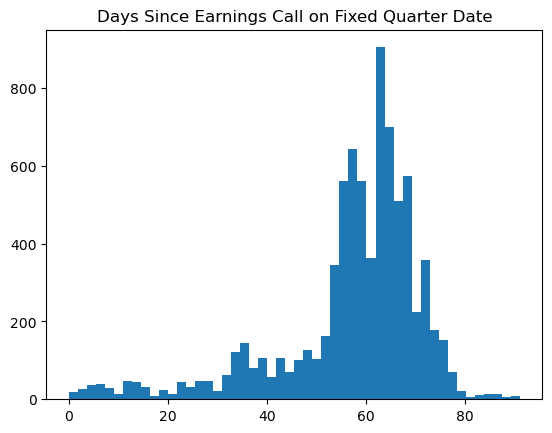

In [246]:
# Check distance between earnings_call_date and fixed_quarter_date
credit_ratings_on_fixed_quarter_dates_with_earnings_call_date['days_since_call'] = (pd.to_datetime(credit_ratings_on_fixed_quarter_dates_with_earnings_call_date['fixed_quarter_date']) - pd.to_datetime(credit_ratings_on_fixed_quarter_dates_with_earnings_call_date['earnings_call_date'])).dt.days

# Summary statistics of days_since_call
print(credit_ratings_on_fixed_quarter_dates_with_earnings_call_date['days_since_call'].describe())
# Share under 7 days (possibly a reasonable amount of time to react to earnings call)
print('share under 7 days since call')
print(sum(credit_ratings_on_fixed_quarter_dates_with_earnings_call_date['days_since_call'] <= 7) / len(credit_ratings_on_fixed_quarter_dates_with_earnings_call_date))

# Histogram of days_since_call
#credit_ratings_on_fixed_quarter_dates_with_earnings_call_date['days_since_call'].plot.hist(bins=50)
plt.hist(credit_ratings_on_fixed_quarter_dates_with_earnings_call_date['days_since_call'], bins=50)
plt.title('Days Since Earnings Call on Fixed Quarter Date')
plt.savefig('../../../Output/fixed_quarter_days_since_call.png')
plt.show()

## Output CSV

In [247]:
# Reorder columns - ticker, fixed_quarter_date, earnings_call_date then all other columns
# Columns to move to the front
cols_to_front = ['ticker', 'fixed_quarter_date', 'earnings_call_date']
# Reorder columns
new_columns_order = cols_to_front + [col for col in credit_ratings_on_fixed_quarter_dates_with_earnings_call_date.columns if col not in cols_to_front]
credit_ratings_on_fixed_quarter_dates_with_earnings_call_date = credit_ratings_on_fixed_quarter_dates_with_earnings_call_date[new_columns_order]

# Save to csv
credit_ratings_on_fixed_quarter_dates_with_earnings_call_date.to_csv('~/Box/STAT 222 Capstone/Intermediate Data/Credit_Rating/credit_ratings_on_fixed_quarter_dates_with_earnings_call_date.csv', index=False)